In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
survey_2018 = pd.read_csv('./resources/04_Kaggle_Survey_2018.csv')
survey_2018 = survey_2018.drop([0],axis=0)
survey_2018.head(2)

//anaconda2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [3]:
total_surveyed = survey_2018['Time from Start to Finish (seconds)'].count()
total_surveyed

23859

In [4]:
courses_2018 = survey_2018[['Q36_Part_1','Q36_Part_2','Q36_Part_3','Q36_Part_4','Q36_Part_5','Q36_Part_6'
                                    ,'Q36_Part_7','Q36_Part_8','Q36_Part_9','Q36_Part_10','Q36_Part_11','Q36_Part_12'
                                    ,'Q36_Part_13','Q36_OTHER_TEXT']]
courses_2018

,Q36_Part_1,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_Part_10,Q36_Part_11,Q36_Part_12,Q36_Part_13,Q36_OTHER_TEXT
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,-1
4,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
5,Udacity,Coursera,edX,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
6,NaN,Coursera,edX,NaN,NaN,Kaggle Learn,NaN,developers.google.com,Udemy,NaN,NaN,NaN,NaN,-1
7,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8,Udacity,NaN,NaN,NaN,NaN,Kaggle Learn,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,-1
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
10,Udacity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [5]:
udacity = courses_2018.count()["Q36_Part_1"]
coursera = courses_2018.count()["Q36_Part_2"]
edX = courses_2018.count()["Q36_Part_3"]
data_camp = courses_2018.count()["Q36_Part_4"]
data_quest = courses_2018.count()["Q36_Part_5"]
kaggle_learn = courses_2018.count()["Q36_Part_6"]
fast_ai = courses_2018.count()["Q36_Part_7"]
developers_google = courses_2018.count()["Q36_Part_8"]
udemy = courses_2018.count()["Q36_Part_9"]
the_schoolai = courses_2018.count()["Q36_Part_10"]
online_university = courses_2018.count()["Q36_Part_11"]
none = courses_2018.count()["Q36_Part_12"]
other = courses_2018.count()["Q36_Part_13"]


In [6]:
df = pd.DataFrame({'Courses':['Udacity', 'Coursera', 'edX','DataCamp','DataQuest','Kaggle Learn','fast.ai',
                                  'Developers.google.com','Udemy','The.School.ai','Online University','None',
                                  'Other'], 'Responded Yes': [udacity, coursera, edX,data_camp,data_quest,kaggle_learn,
                                   fast_ai,developers_google,udemy,the_schoolai,online_university,none,other]})
df = df.sort_values('Responded Yes')

df

,Courses,Responded Yes
9,The.School.ai,279
4,DataQuest,708
7,Developers.google.com,1040
12,Other,1244
6,fast.ai,1570
10,Online University,1952
11,None,1976
2,edX,3663
0,Udacity,3676
5,Kaggle Learn,4002


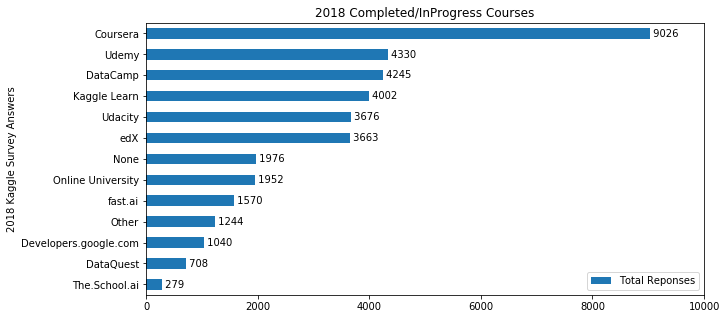

In [7]:
#Plot Graph 
ax = df.plot.barh(x='Courses', y='Responded Yes', figsize=(10,5), title ="2018 Completed/InProgress Courses", label = "Total Reponses")

# Add Response Values 
y = df['Responded Yes']
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')
    
ax.set_xlim([0,10000])
plt.ylabel("2018 Kaggle Survey Answers")

ax

In [8]:
courses_summary = pd.DataFrame ({"Udacity":[udacity],
                                 "Coursera":[coursera],
                                 "edX":[edX],
                                 "DataCamp":[data_camp],
                                 "DataQuest":[data_quest],
                                 "Kaggle Learn":[kaggle_learn],
                                 "fast.ai":[fast_ai],
                                 "Developers.google.com":[developers_google],
                                 "Udemy":[udemy],
                                 'The.School.ai ':[the_schoolai],
                                 'Online University':[online_university],
                                 'None':[none],
                                 'Other':[other]
                                })


courses_summary

,Udacity,Coursera,edX,DataCamp,DataQuest,Kaggle Learn,fast.ai,Developers.google.com,Udemy,The.School.ai,Online University,None,Other
0,3676,9026,3663,4245,708,4002,1570,1040,4330,279,1952,1976,1244


In [9]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("2018_completed_courses.png")

In [10]:
databases = survey_2018[['Q33_Part_1',
                              'Q33_Part_2',
                              'Q33_Part_3',
                              'Q33_Part_4',
                              'Q33_Part_5',
                              'Q33_Part_6',
                              'Q33_Part_7',
                              'Q33_Part_8',
                              'Q33_Part_9',
                              'Q33_Part_10',
                              'Q33_Part_11']]
databases

,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Government websites,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...",NaN,NaN,NaN,NaN,GitHub,NaN,NaN
4,Government websites,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...","I collect my own data (web-scraping, etc.)",NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Publicly released data from private companies,NaN,NaN,NaN,NaN,NaN
6,Government websites,University research group websites,Non-profit research group websites,"Dataset aggregator/platform (Socrata, Kaggle P...","I collect my own data (web-scraping, etc.)",Publicly released data from private companies,Google Search,Google Dataset Search,GitHub,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,NaN
8,NaN,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...",NaN,NaN,Google Search,NaN,NaN,NaN,Other
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,"Dataset aggregator/platform (Socrata, Kaggle P...","I collect my own data (web-scraping, etc.)",NaN,Google Search,Google Dataset Search,NaN,NaN,NaN


In [11]:
gov_website = databases.count()["Q33_Part_1"]
uni_research = databases.count()["Q33_Part_2"] 
non_profit = databases.count()["Q33_Part_3"]
aggregator = databases.count()["Q33_Part_4"]
my_own =  databases.count()["Q33_Part_5"]
publicly_released = databases.count()["Q33_Part_6"]
google_search = databases.count()["Q33_Part_7"]
google_dataset = databases.count()["Q33_Part_8"]
github = databases.count()["Q33_Part_9"]
none = databases.count()["Q33_Part_10"]
other = databases.count()["Q33_Part_11"]

In [12]:
databases = pd.DataFrame({'Databases':['Government websites', 
                                       'University research group websites', 
                                       'Non-profit research group websites',
                                       'Dataset aggregator/platform (Socrata, Kaggle,etc)',
                                       'I collect my own data (web-scraping, etc.)',
                                       'Publicly released data from private companies',
                                       'Google Search',
                                       'Google Dataset Search',
                                       'GitHub','None, I do not work w/public data',
                                       'Other'], 
                          'Responses':[gov_website, uni_research, non_profit,aggregator, my_own,publicly_released,
                                       google_search,google_dataset,github,none,other]})

databases = databases.sort_values('Responses')

databases

,Databases,Responses
10,Other,449
9,"None, I do not work w/public data",2027
2,Non-profit research group websites,2808
5,Publicly released data from private companies,2997
7,Google Dataset Search,3684
1,University research group websites,4103
0,Government websites,4757
4,"I collect my own data (web-scraping, etc.)",5225
8,GitHub,6075
6,Google Search,7013


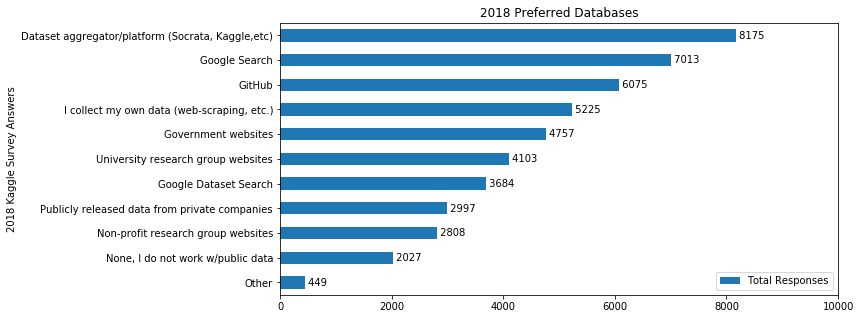

In [13]:
#Plot Graph 
ax = databases.plot.barh(x='Databases', y='Responses', figsize=(10,5), title ="2018 Preferred Databases", label="Total Responses")
# Add Response Values 

y = databases['Responses']

for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')

ax.legend(loc='lower right')

plt.ylabel("2018 Kaggle Survey Answers")

ax.set_xlim([0,10000])

ax

In [14]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("2018_preferred_databases.png")

In [15]:
df_39 = survey_2018[['Q39_Part_1']]
df_39.head()

,Q39_Part_1
1,Much better
2,Slightly worse
3,Slightly worse
4,Much worse
5,Slightly better


In [16]:
slightly_better = df_39.loc[df_39["Q39_Part_1"] == "Slightly better"].count()
no_opinion = df_39.loc[df_39["Q39_Part_1"] == "No opinion; I do not know"].count()
much_better = df_39.loc[df_39["Q39_Part_1"] == "Much better"].count()
neither = df_39.loc[df_39["Q39_Part_1"] == "Neither better nor worse"].count()
slightly_worse = df_39.loc[df_39["Q39_Part_1"] == "Slightly worse"].count()
much_worse = df_39.loc[df_39["Q39_Part_1"] == "Much worse"].count()

responses_39 = pd.DataFrame({
                        'Responses':["Much Better", "Slightly Better",'Neither Better nor Worse',"Slightly Worse","Much Worse","No Opinion"], 
                          'Totals':[much_better, slightly_better, neither, slightly_worse, much_worse, no_opinion]})
responses_39

,Responses,Totals
0,Much Better,Q39_Part_1 3908 dtype: int64
1,Slightly Better,Q39_Part_1 4554 dtype: int64
2,Neither Better nor Worse,Q39_Part_1 3647 dtype: int64
3,Slightly Worse,Q39_Part_1 1749 dtype: int64
4,Much Worse,Q39_Part_1 557 dtype: int64
5,No Opinion,Q39_Part_1 1564 dtype: int64


In [17]:
responses_39 = responses_39.astype({'Responses': object, 'Totals': int})
responses_39


,Responses,Totals
0,Much Better,3908
1,Slightly Better,4554
2,Neither Better nor Worse,3647
3,Slightly Worse,1749
4,Much Worse,557
5,No Opinion,1564


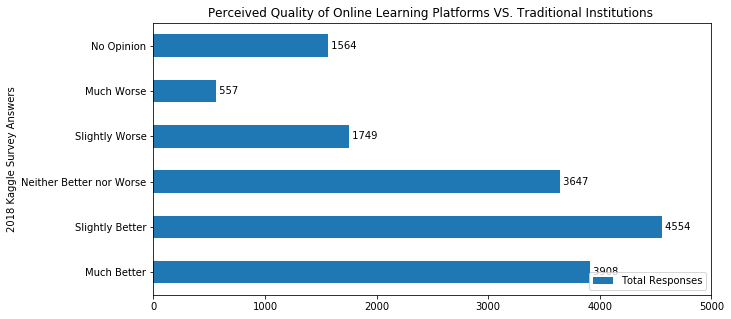

In [19]:
#Plot Graph 
ax = responses_39.plot.barh(x='Responses', y='Totals', figsize=(10,5), 
                            title ="Perceived Quality of Online Learning Platforms VS. Traditional Institutions ", label="Total Responses")
# Add Response Values 
y = responses_39['Totals']

# Add Response Total 
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')

# Format
ax.legend(loc='lower right')
plt.ylabel("2018 Kaggle Survey Answers")
ax.set_xlim([0,5000])
ax

In [20]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("2018_online_vs_traditional.png")

In [21]:
df_39_2 = survey_2018[['Q39_Part_2']]
df_39_2.head()

,Q39_Part_2
1,Much worse
2,No opinion; I do not know
3,Slightly better
4,No opinion; I do not know
5,Much better


In [22]:
slightly_better_2 = df_39_2.loc[df_39_2["Q39_Part_2"] == "Slightly better"].count()
no_opinion_2 = df_39_2.loc[df_39_2["Q39_Part_2"] == "No opinion; I do not know"].count()
much_better_2 = df_39_2.loc[df_39_2["Q39_Part_2"] == "Much better"].count()
neither_2 = df_39_2.loc[df_39_2["Q39_Part_2"] == "Neither better nor worse"].count()
slightly_worse_2 = df_39_2.loc[df_39_2["Q39_Part_2"] == "Slightly worse"].count()
much_worse_2 = df_39_2.loc[df_39_2["Q39_Part_2"] == "Much worse"].count()

In [23]:
df_39_2 = pd.DataFrame({'Responses':["Much Better", 
                                "Slightly Better",
                                'Neither Better nor Worse',
                                "Slightly Worse",
                                "Much Worse",
                                "No Opinion"], 
                          'Totals':[much_better_2, slightly_better_2, neither_2, slightly_worse_2, much_worse_2, no_opinion_2]})

df_39_2

,Responses,Totals
0,Much Better,Q39_Part_2 2781 dtype: int64
1,Slightly Better,Q39_Part_2 3525 dtype: int64
2,Neither Better nor Worse,Q39_Part_2 3011 dtype: int64
3,Slightly Worse,Q39_Part_2 982 dtype: int64
4,Much Worse,Q39_Part_2 367 dtype: int64
5,No Opinion,Q39_Part_2 5313 dtype: int64


In [24]:
df_39_2 = df_39_2.astype({'Responses': object, 'Totals': int})
df_39_2

,Responses,Totals
0,Much Better,2781
1,Slightly Better,3525
2,Neither Better nor Worse,3011
3,Slightly Worse,982
4,Much Worse,367
5,No Opinion,5313


(0, 6000)

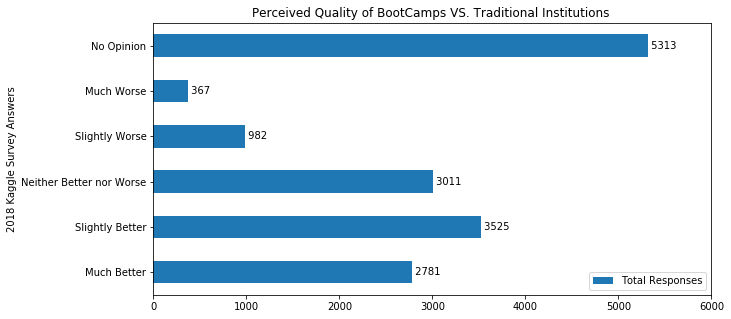

In [28]:
#Plot Graph 
ax = df_39_2.plot.barh(x='Responses', y='Totals', figsize=(10,5), 
                            title ="Perceived Quality of BootCamps VS. Traditional Institutions ", label="Total Responses")
# Add Response Values 
y = df_39_2['Totals']

# Add Response Total 
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')

# Format
ax.legend(loc='lower right')
plt.ylabel("2018 Kaggle Survey Answers")
ax.set_xlim([0,6000])

In [29]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("2018_bootcamps_vs_traditional.png")

In [ ]:
df_39 = survey_2018[['Q39_Part_1','Q39_Part_2']]
df_39.head()

In [ ]:
slightly_better = df_39.loc[df_39["Q39_Part_1"] == "Slightly better"].count()
no_opinion = df_39.loc[df_39["Q39_Part_1"] == "No opinion; I do not know"].count()
much_better = df_39.loc[df_39["Q39_Part_1"] == "Much better"].count()
neither = df_39.loc[df_39["Q39_Part_1"] == "Neither better nor worse"].count()
slightly_worse = df_39.loc[df_39["Q39_Part_1"] == "Slightly worse"].count()
much_worse = df_39.loc[df_39["Q39_Part_1"] == "Much worse"].count()

slightly_better_2 = df_39.loc[df_39["Q39_Part_2"] == "Slightly better"].count()
no_opinion_2 = df_39.loc[df_39["Q39_Part_2"] == "No opinion; I do not know"].count()
much_better_2 = df_39.loc[df_39["Q39_Part_2"] == "Much better"].count()
neither_2 = df_39.loc[df_39["Q39_Part_2"] == "Neither better nor worse"].count()
slightly_worse_2 = df_39.loc[df_39["Q39_Part_2"] == "Slightly worse"].count()
much_worse_2 = df_39.loc[df_39["Q39_Part_2"] == "Much worse"].count()

In [ ]:
responses_39 = pd.DataFrame({
                        'Responses':["Much Better", "Slightly Better",'Neither Better nor Worse',"Slightly Worse","Much Worse","No Opinion"], 
                          'Totals':[much_better, slightly_better, neither, slightly_worse, much_worse, no_opinion],
                        'Totals_2':[much_better_2, slightly_better_2, neither_2, slightly_worse_2, much_worse_2,no_opinion_2]
})
responses_39

In [ ]:
df = responses_39.astype({'Responses': object, 'Totals': int, 'Totals_2': int}) 
df

In [ ]:
#Plot Graph 
ax = responses_39.plot.barh(x='Responses', y='Totals', figsize=(10,5), 
                            title ="Perceived Quality of Online Learning Platforms & In-Person Bootcamps VS. Traditional Institutions ", label="Total Responses")
# Add Response Values 
y = responses_39['Totals']

# Add Response Total 
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')

# Format
ax.legend(loc='lower right')
plt.ylabel("2018 Kaggle Survey Answers")
ax.set_xlim([0,5000])
ax

In [ ]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("2018_online_vs_traditional.png")

In [ ]:
#Plot Graph 
ax = responses_39.plot.barh(x='Responses', y='Totals', figsize=(10,5), 
                            title ="Perceived Quality of Online Learning Platforms & In-Person Bootcamps VS. Traditional Institutions ", label="Total Responses")
# Add Response Values 
y = responses_39['Totals']

# Add Response Total 
for i, v in enumerate(y):
    ax.text(v, i, " "+str(v), color='black', va='center')

# Format
ax.legend(loc='lower right')
plt.ylabel("2018 Kaggle Survey Answers")
ax.set_xlim([0,5000])
ax

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax = responses_39_2.plot.barh(x='Responses', y='Totals', figsize=(10,5),color = "g")
ax2 = responses_39.plot.barh(x='Responses', y='Totals', figsize=(10,5))

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('online', 'bootcamp') )
ax.legend( (online[0], bootcamp[0], ('y', 'z') )

for rect in ax:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()